In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is DAB4-A17B

 Directory of C:\Users\Noora\Desktop\Image -processing\image-processing-\AI Data Preprocessing\data

01/16/2022  05:18 AM    <DIR>          .
01/16/2022  05:18 AM    <DIR>          ..
01/16/2022  01:52 AM    <DIR>          crop
01/16/2022  04:36 AM       437,462,378 data_10000_norm.npz
01/16/2022  05:18 AM         2,289,820 data_pca_50_y_mean.pickle.npz
01/16/2022  03:55 AM        54,799,174 dataframe_images_100_100.pickle
01/15/2022  09:17 PM    <DIR>          female
01/15/2022  09:18 PM    <DIR>          male
03/22/2020  08:09 AM         5,908,737 video.mp4
               4 File(s)    500,460,109 bytes
               5 Dir(s)  288,922,013,696 bytes free


In [3]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [4]:
#arr_0 is xpc
#arr_1 is target
#arr_3 is mean


In [5]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4374, 50), (1094, 50), (4374,), (1094,))

# Training a Machine Learning Model

In [7]:
from sklearn.svm import SVC

In [8]:
#SVC Maximum margin classifier
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,)

In [9]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [10]:
# score
model.score(x_train,y_train)

0.8641975308641975

In [11]:
# score
model.score(x_test,y_test)

0.7952468007312614

# Machine Learning Model Evaluation
    - Confusion Matrix
    - Classification Report
    - Kappa Score
    - ROC and AUC (probability)

In [12]:
from sklearn import metrics

In [13]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

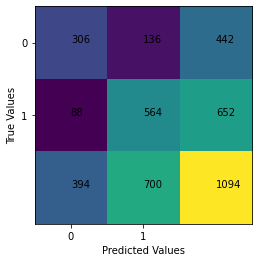

In [17]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [18]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.776650,0.692308,0.732057,442.000000
female,0.805714,0.865031,0.834320,652.000000
accuracy,0.795247,0.795247,0.795247,0.795247
macro avg,0.791182,0.778669,0.783188,1094.000000
weighted avg,0.793972,0.795247,0.793003,1094.000000


In [19]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5672590625264883

# ROC and AUC

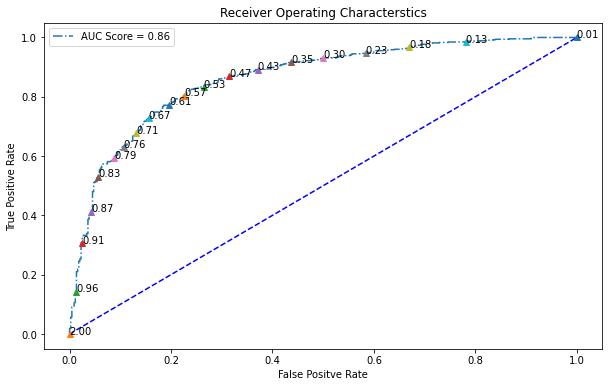

In [20]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

# Hyper Parameter Tuning

In [21]:
model_tune = SVC()

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }

In [24]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

In [25]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   4.7s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   3.2s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   3.4s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   3.1s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   2.9s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   3.2s
[CV] END ...............C=1, coef0=0, gamma=0.05, kernel=rbf; total time=   4.0s
[CV] END ...............C=1, coef0=0, gamma=0.

[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   3.1s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   3.1s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   3.0s
[CV] END ..............C=1, coef0=1, gamma=0.002, kernel=rbf; total time=   3.1s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.8s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.8s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.8s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.8s
[CV] END .............C=1, coef0=1, gamma=0.002, kernel=poly; total time=   1.7s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   3.1s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   3.0s
[CV] END ..............C=1, coef0=1, gamma=0.005, kernel=rbf; total time=   3.1s
[CV] END ..............C=1, 

[CV] END ..............C=10, coef0=1, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END ..............C=10, coef0=1, gamma=0.01, kernel=rbf; total time=   3.3s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   3.1s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   3.1s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   3.0s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   3.0s
[CV] END .............C=10, coef0=1, gamma=0.01, kernel=poly; total time=   3.1s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   2.9s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   2.8s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   2.9s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   2.8s
[CV] END .............C=10, coef0=1, gamma=0.001, kernel=rbf; total time=   2.9s
[CV] END ............C=10, c

[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   2.2s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   2.3s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   2.8s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   2.2s
[CV] END ..............C=20, coef0=1, gamma=0.1, kernel=poly; total time=   2.2s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END ..............C=20, coef0=1, gamma=0.05, kernel=rbf; total time=   3.9s
[CV] END .............C=20, coef0=1, gamma=0.05, kernel=poly; total time=   1.9s
[CV] END .............C=20, coef0=1, gamma=0.05, kernel=poly; total time=   2.0s
[CV] END .............C=20, 

[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   2.5s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   2.6s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   2.5s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   3.8s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   3.7s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   3.8s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   3.7s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   3.7s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   2.5s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   2.5s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   2.5s
[CV] END ............C=30, coef0=0, gamma=0.005, kernel=poly; total time=   2.5s
[CV] END ............C=30, c

[CV] END .............C=50, coef0=0, gamma=0.01, kernel=poly; total time=   2.9s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END .............C=50, coef0=0, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   2.6s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   2.5s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   2.6s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   2.6s
[CV] END ............C=50, coef0=0, gamma=0.001, kernel=poly; total time=   2.5s
[CV] END .............C=50, coef0=0, gamma=0.002, kernel=rbf; total time=   3.8s
[CV] END .............C=50, 

[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END .............C=100, coef0=0, gamma=0.05, kernel=rbf; total time=   3.8s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   3.0s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   3.2s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   2.9s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   3.1s
[CV] END ............C=100, coef0=0, gamma=0.05, kernel=poly; total time=   3.2s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END .............C=100, coef0=0, gamma=0.01, kernel=rbf; total time=   4.1s
[CV] END .............C=100,

[CV] END ............C=100, coef0=1, gamma=0.005, kernel=rbf; total time=   5.3s
[CV] END ............C=100, coef0=1, gamma=0.005, kernel=rbf; total time=   5.3s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   6.9s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   6.4s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   6.7s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   6.0s
[CV] END ...........C=100, coef0=1, gamma=0.005, kernel=poly; total time=   6.8s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [30]:
model_grid.best_params_

{'C': 50, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

In [29]:
model_grid.best_score_

0.7840149463680292

In [31]:
# WIth best parameter buil ML Model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [32]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.7952468007312614

In [33]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

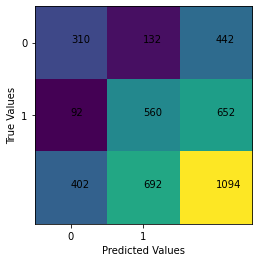

In [34]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [35]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.771144,0.701357,0.734597,442.000000
female,0.809249,0.858896,0.833333,652.000000
accuracy,0.795247,0.795247,0.795247,0.795247
macro avg,0.790196,0.780127,0.783965,1094.000000
weighted avg,0.793854,0.795247,0.793442,1094.000000


In [36]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5685390726238098

# ROC and AUC

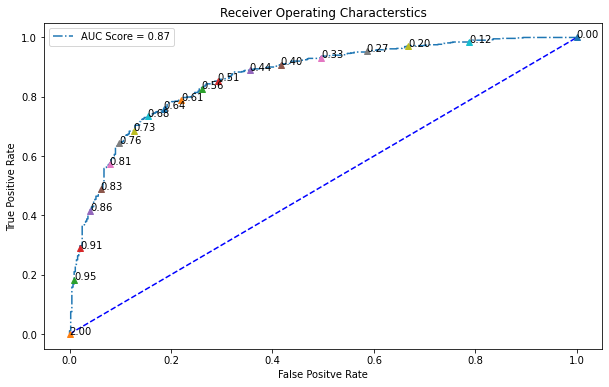

In [38]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [39]:
# save our machine learning model
import pickle

In [40]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [41]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))